Jeu de données Regression multiple utilisé dans mon projet github :
- (https://github.com/nagueuleo/House_Prediction)

## Chargement des librairies

In [2]:
! pip install missingno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Importation de la base de données

In [4]:
df = pd.read_csv("regression_multiple.csv")

Affichage de la base de données 

In [5]:
df.head()

,Superficie,Nombre de chambres,Proximité du centre,Prix
0,152,1,9.306509,476.279241
1,142,5,5.629593,535.910505
2,64,5,8.499316,279.067426
3,156,3,5.449101,531.408138
4,121,2,6.424064,411.389675


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Superficie           1000 non-null   int64  
 1   Nombre de chambres   1000 non-null   int64  
 2   Proximité du centre  1000 non-null   float64
 3   Prix                 1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [7]:
df.shape

(1000, 4)

In [8]:
df.describe()

,Superficie,Nombre de chambres,Proximité du centre,Prix
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,125.846000,2.997000,5.256021,446.381427
std,43.786911,1.423734,2.746007,133.401741
min,50.000000,1.000000,0.501280,176.963125
25%,88.000000,2.000000,2.967089,333.717050
50%,126.500000,3.000000,5.303712,446.780920
75%,164.000000,4.000000,7.665203,559.501390
max,199.000000,5.000000,9.984301,713.698000


In [9]:
df.isna().sum()

Superficie             0
Nombre de chambres     0
Proximité du centre    0
Prix                   0
dtype: int64

Ici il y'a aucune valeur manquante  donc nous allons pas supprimé les données manquante parcequ'il n'existe pas

In [10]:
#df = df.dropna()

Affichons la heatmap pour visualisé les données manquante pour nous rassurer

<Axes: >

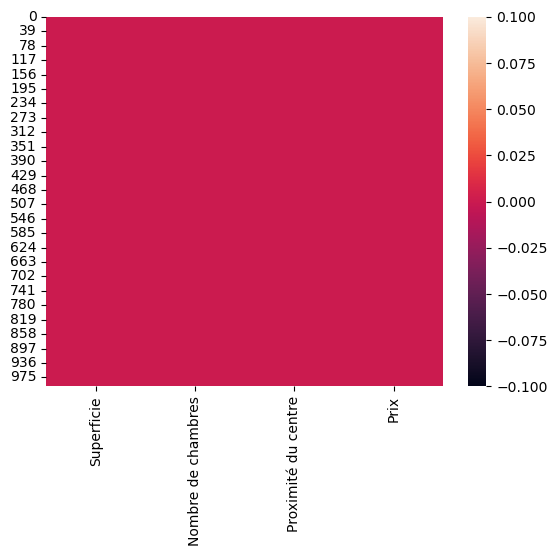

In [11]:
sns.heatmap(df.isnull())

Il y'a aucune valeur null dans la base de données 

<Axes: >

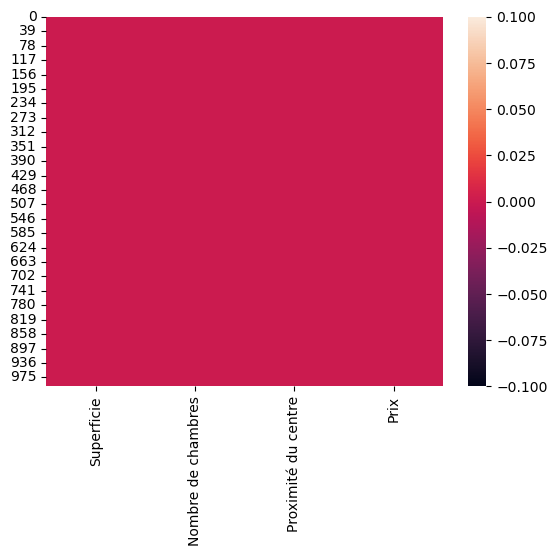

In [12]:
sns.heatmap(df.isna())

<Axes: >

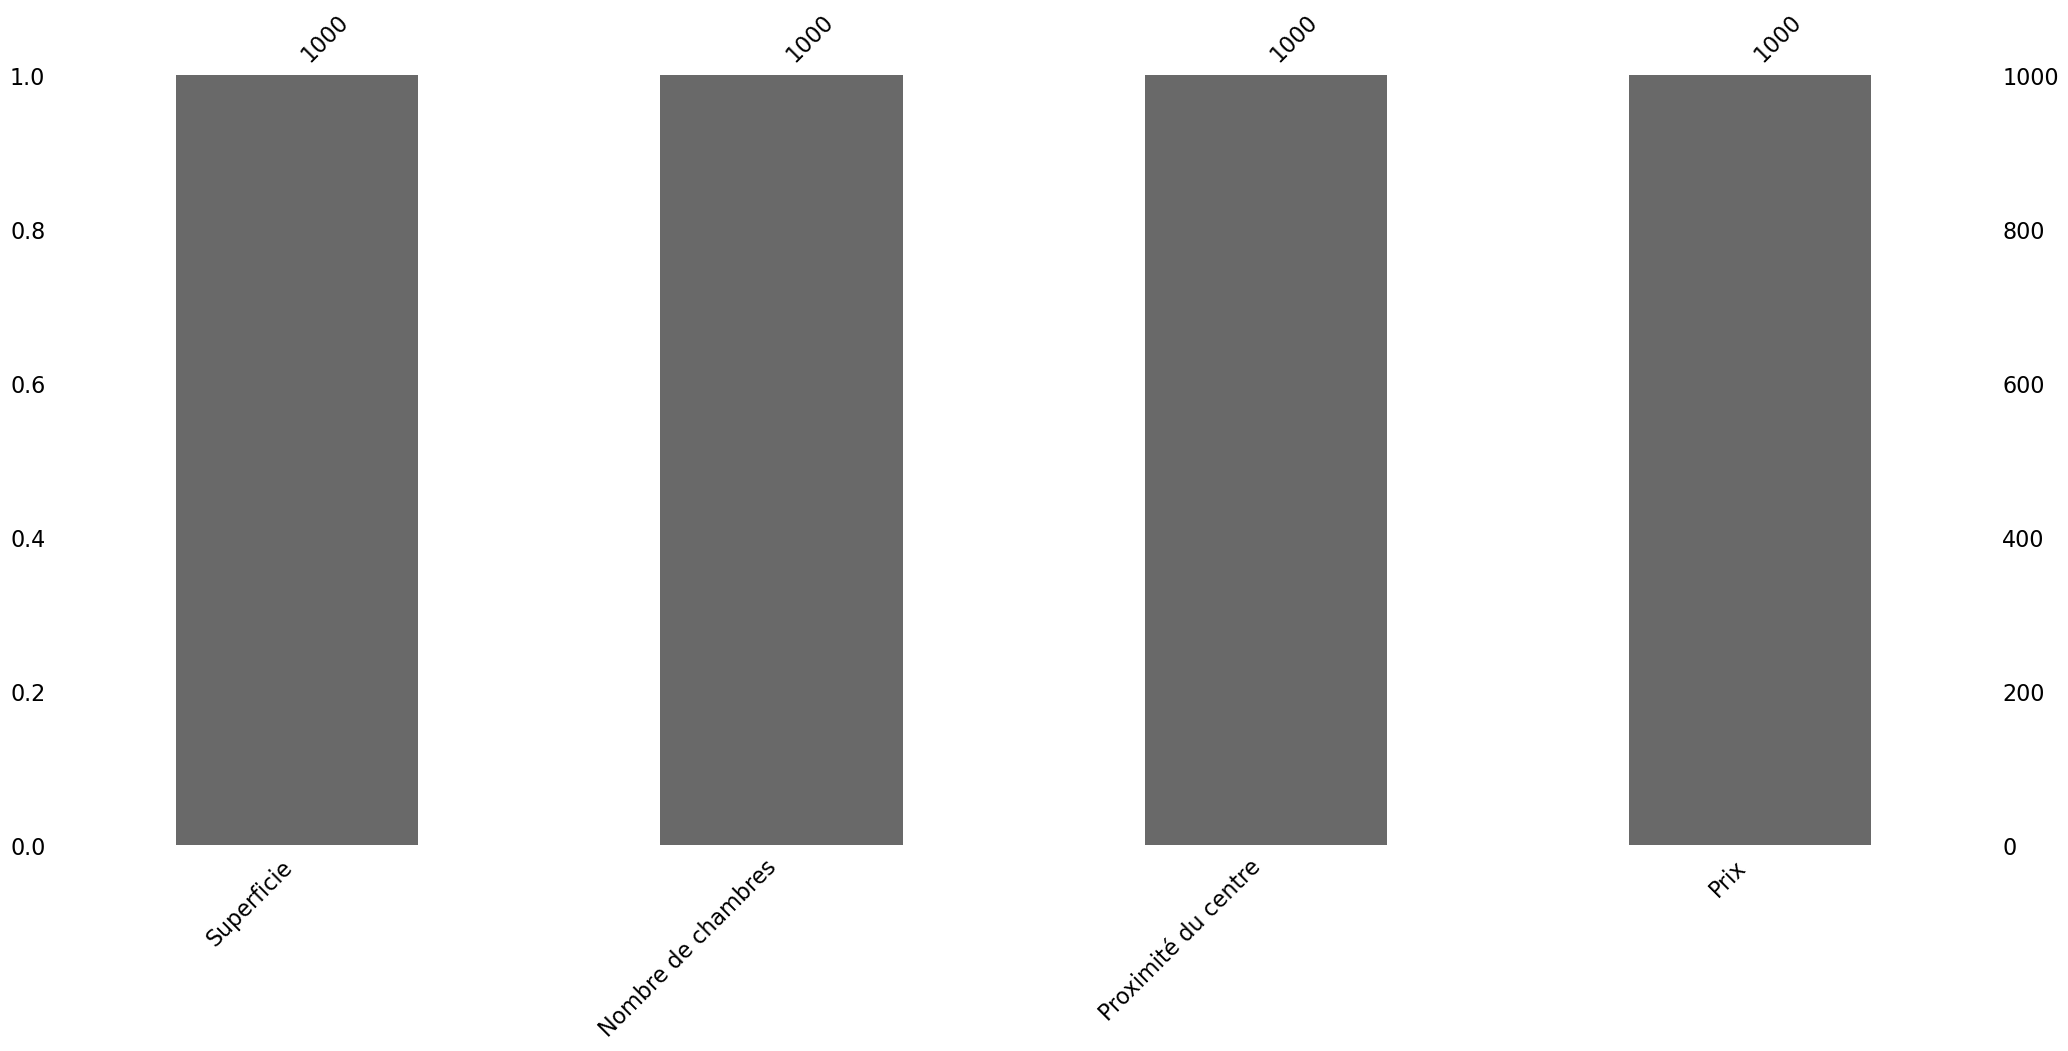

In [13]:
msno.bar(df)

Heatmap du jeu de données complet

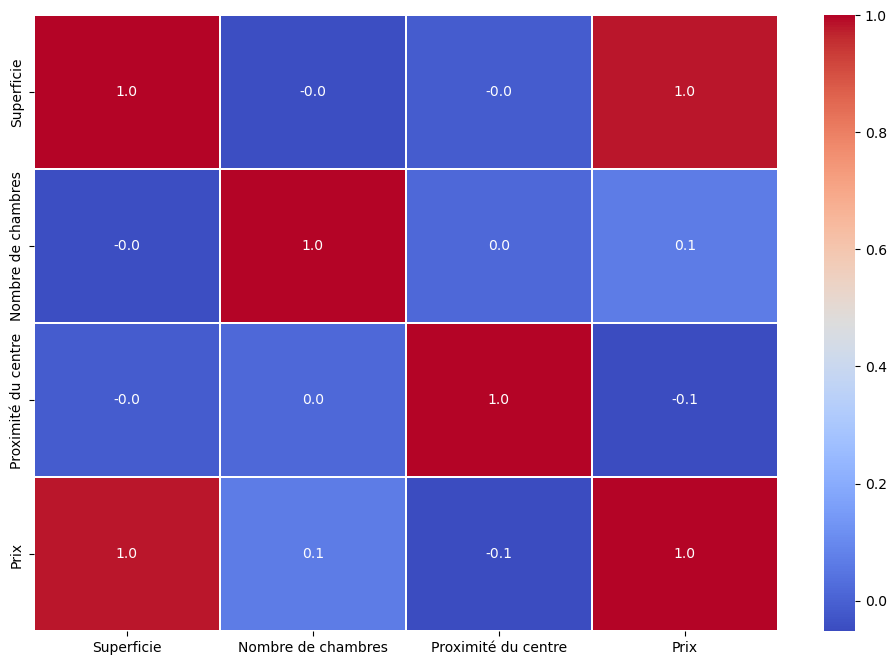

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [15]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Pour entrainner notre jeu de données nous allons prendre X comme toute les variable sauf le prix comme feature (variables explicatives) et y le prix comme target (cible)

Application d'encodage des variables catégorielles si nécessaire 

In [18]:
#X = pd.get_dummies(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Superficie           1000 non-null   int64  
 1   Nombre de chambres   1000 non-null   int64  
 2   Proximité du centre  1000 non-null   float64
 3   Prix                 1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


dans notre jeu de données nous avons aucune variable catégorielle donc nous allons pas appliquer de l'encodage 

Séparation de notre jeu de données en entrainnement et test

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Transformation de mon jeu de données d'entrainnement en utlisant le StandardScaler

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

Importation de la regression linaire et voir quel est sont les meilleurs hyperparamètres

In [32]:
from sklearn.ensemble import RandomForestRegressor
#imporattion des bibliothèques de la regression lineaire 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [38]:
def get_score(n_estimators):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=100)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)

    return MAE, MSE

In [44]:
from sklearn.ensemble import RandomForestRegressor
random_forest_tree_numbers = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

results = {}

for i in random_forest_tree_numbers:
    result = get_score(i)
    results[i] = result

results

{50: (19.2834604727703, 561.5807139312773),
 100: (19.060599462475952, 551.8563445203773),
 150: (19.155110052267048, 557.383681509911),
 200: (19.108490928667152, 556.1144562078771),
 250: (19.15083332018873, 560.1208829546497),
 300: (19.208344333636077, 562.392300181982),
 350: (19.169510297511188, 560.2088629787518),
 400: (19.152391513035862, 560.5443948808867),
 450: (19.1358615115507, 560.8260238263013),
 500: (19.139682929340545, 561.3194467095766)}

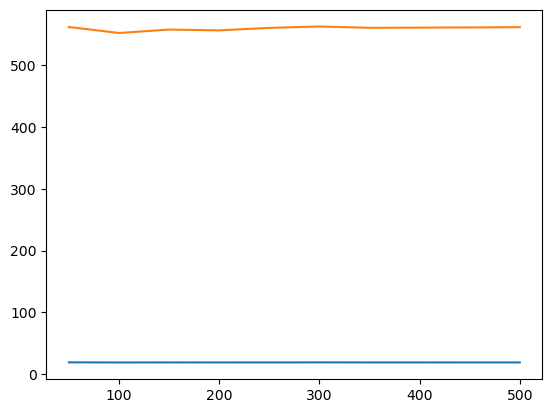

In [45]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

Les meilleur paramètres du randoms forest est 400

In [42]:
best_random_forest = RandomForestRegressor(n_estimators=400, random_state=100)

best_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=100)

validation des résultats

In [46]:
y_pred = best_random_forest.predict(X_test)

print("Test Score:" + str(best_random_forest.score(X_test, y_test)))

MAE = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

Test Score:0.9706239482767784
MAE: 19.152391513035862
R2 Score: 0.9706239482767784


Importation de l'algorithme XGBRegressor

In [48]:
# Install xgboost package
%pip install xgboost

from xgboost import XGBRegressor

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
! pip install --upgrade xgboost

In [68]:
import xgboost as xgb
from xgboost import XGBRegressor

In [65]:
! pip install xgboost scikit-learn

In [58]:
#xgb_model = xgb.XGBRegressor()

In [118]:
xgb_model =XGBRegressor(n_estimators=800, learning_rate=0.05)

In [119]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

resultat de la validation du XGBRegressor

In [120]:
predictions = xgb_model.predict(X_test)

print("Test Score: " + str(xgb_model.score(X_test, y_test)))

print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))

print("R2 Score: " + str(r2_score(y_test, predictions)))

Test Score: 0.9703638293890733
MAE: 18.75113328864335
MSE: 565.5079000475974
R2 Score: 0.9703638293890733


Text(0.5, 1.0, 'Evaluation of the XGBRegressor Model')

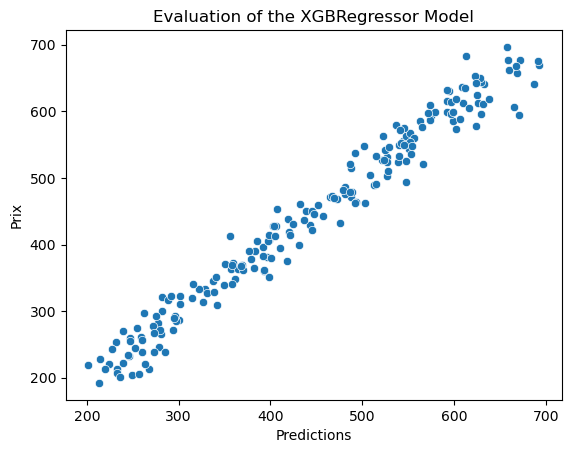

In [121]:
sns.scatterplot(x=predictions,y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of the XGBRegressor Model")

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [123]:
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))
print("Mean Squared Error", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error 18.75113328864335
Mean Squared Error 565.5079000475974
Root Mean Squared Error 23.780410005876632


In [124]:
residuals = y_test - predictions

In [125]:
residuals

221    -7.373476
988    23.844729
882    21.223360
500    -0.342599
106    42.437903
         ...    
699     4.009878
356    44.762179
659    70.216357
465   -46.890414
547    -0.596767
Name: Prix, Length: 200, dtype: float64

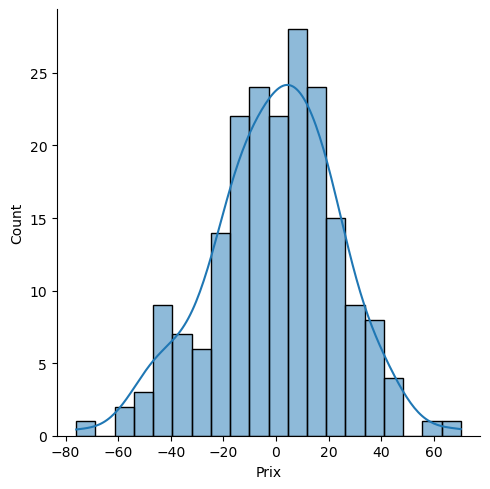

In [126]:
sns.displot(residuals, bins = 20, kde = True)

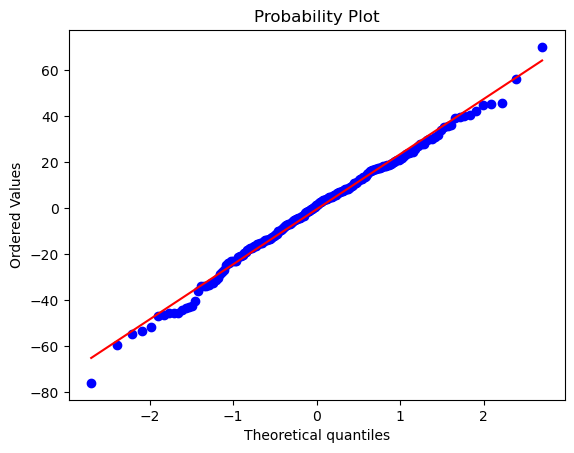

In [127]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Importation du modèle de regrssion linaire

In [128]:
from sklearn.linear_model import LinearRegression

LinearRegression Validation Results

In [129]:
simple_model = LinearRegression()

simple_model.fit(X_train, y_train)

y_pred = simple_model.predict(X_test)

print("Test Score:" + str(simple_model.score(X_test, y_test)))

MAE = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

Test Score:0.9783578458275712
MAE: 16.31356198293663
R2 Score: 0.9783578458275712


Le XGBRegressor a donné les meilleurs résultats, avec une précision de 97%, donc ce modèle va être sauvegardé également avec le Scaler

In [130]:
import pickle as pkl

In [131]:
pkl.dump(scaler, open(f"./model/scaler.pkl", "wb"))

In [132]:
pkl.dump(xgb_model, open(f"./model/house_price_model.pkl", "wb"))